In [1]:
import os
import random
from scipy import ndarray
import cv2
# !pip3 install scikit-image
# image processing library
import skimage as sk
from skimage import transform
from skimage import util
from skimage import io
from skimage.io import imread

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow

import cv2
from PIL import Image
# print("done")

In [2]:
df=pd.read_csv('train_500.csv')

In [3]:
l=df['Id'].value_counts().tail(100).index.tolist()
#print(l)
p=[]
for i in range(len(df)):
    for j in range(len(l)):
        if df['Id'][i]==l[j]:
            p.append([df['Image'][i],l[j]])
    

In [4]:
print(p[0])
print(len(p))

['00022e1a.jpg', 'w_e15442c']
100


In [5]:
print(p[0][0])

00022e1a.jpg


In [6]:
def random_rotation(image_array):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]



In [7]:
# dictionary of the transformations we defined earlier
available_transformations = {
    'rotate': random_rotation,
    'noise': random_noise,
    'horizontal_flip': horizontal_flip
}



aug_i=[]
id=[]
for i in range(2,len(p)):
    num_generated_files = 0
    image_path = 'train_whale/'+p[i][0]
    # read image as an two dimensional array of pixels
    image_to_transform = sk.io.imread(image_path)
    random_degree = random.uniform(-25, 25)
    transformed_image=sk.transform.rotate(image_to_transform, random_degree)
    io.imsave('AugTrain/r'+p[i][0], transformed_image)
    aug_i.append('f'+p[i][0])
    id.append(p[i][1])
    
    transformed_image=sk.util.random_noise(image_to_transform)
    io.imsave('AugTrain/n'+p[i][0], transformed_image)
    aug_i.append('f'+p[i][0])
    id.append(p[i][1])
    transformed_image=image_to_transform[:, ::-1]
    io.imsave('AugTrain/f'+p[i][0], transformed_image)
    aug_i.append('f'+p[i][0])
    id.append(p[i][1])

FileNotFoundError: No such file: '/home/bin4rygh0st/14503028_Ankit_Goel/train_whale/0042dcc4.jpg'

In [ ]:
print(aug_i[0])

In [8]:
d = {'Image':aug_i,'Id':id}
t = pd.DataFrame(d)
#print(t.head)
t.to_csv('aug.csv')

In [21]:

for i in range(len(aug_p)):
    df.append(aug_p[i])

NameError: name 'aug_p' is not defined

In [22]:
df.describe()

,Image,Id
count,1850,1850
unique,1850,500
top,2c3b34a3.jpg,w_1287fbc
freq,1,34


In [23]:
df.to_csv('train_200_v1.csv')

In [24]:
df['Id'].value_counts()

w_1287fbc    34
w_98baff9    27
w_7554f44    26
w_1eafe46    23
w_693c9ee    22
             ..
w_effd0ea     1
w_e07f3d1     1
w_a1b985a     1
w_6871147     1
w_27cf4e2     1
Name: Id, Length: 500, dtype: int64

In [25]:
df=pd.read_csv('train_500.csv')

In [26]:
df['Image'][0]

'00022e1a.jpg'

In [27]:
p=[]
for i in range(len(df)):
    p.append([df['Image'][i],df['Id'][i]])

In [28]:
p[0][1]

'w_e15442c'

In [29]:
# available_transformations = {
#     'rotate': random_rotation,
#     'noise': random_noise,
#     'horizontal_flip': horizontal_flip
# }



aug_i=[]
id=[]
for i in range(len(p)):
    image_path = 'train_whale_500/'+p[i][0]
    # read image as an two dimensional array of pixels
    image_to_transform = sk.io.imread(image_path)
    random_degree = random.uniform(-25, 25)
    transformed_image1=sk.transform.rotate(image_to_transform, random_degree)
    io.imsave('AugTrain_500/r'+p[i][0], transformed_image1)
    aug_i.append('r'+p[i][0])
    id.append(p[i][1])
    
    transformed_image2=sk.util.random_noise(image_to_transform)
    io.imsave('AugTrain_500/n'+p[i][0], transformed_image2)
    aug_i.append('n'+p[i][0])
    id.append(p[i][1])
    transformed_image3=image_to_transform[:, ::-1]
    io.imsave('AugTrain_500/f'+p[i][0], transformed_image3)
    aug_i.append('f'+p[i][0])
    id.append(p[i][1])

FileNotFoundError: No such file: '/home/bin4rygh0st/14503028_Ankit_Goel/train_whale_500/00022e1a.jpg'

In [30]:
d = {'Image':aug_i,'Id':id}
t = pd.DataFrame(d)
#print(t.head)
t.to_csv('aug_500.csv')

In [31]:
for i in range(len(df)):
    img_path = 'train_whale_500/'+df.iloc[i]['Image']
    img = cv2.imread(img_path)
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0) 
    cv2.imwrite('AugTrain_500/b'+df.iloc[i]['Image'], blur)
    aug_i.append('b'+df.iloc[i]['Image'])
    id.append(df.iloc[i]['Id'])

error: /build/opencv-iC2m9y/opencv-3.2.0+dfsg/modules/imgproc/src/color.cpp:9748: error: (-215) scn == 3 || scn == 4 in function cvtColor


In [32]:
d = {'Image':aug_i,'Id':id}
t = pd.DataFrame(d)
#print(t.head)
t.to_csv('aug_500.csv')

In [33]:
image=[]
id=[]
df=pd.read_csv('train_500.csv')
df2=pd.read_csv('aug_500.csv')
for i in range(len(df)):
    image.append(df.iloc[i]['Image'])
    id.append(df.iloc[i]['Id'])
for i in range(len(df2)):
    image.append(df2.iloc[i]['Image'])
    id.append(df2.iloc[i]['Id'])
    

In [34]:
print(len(image))
print(len(id))

1850
1850


In [35]:
d = {'Image':image,'Id':id}
t = pd.DataFrame(d)
#print(t.head)
t.to_csv('final_train_500.csv')

In [36]:
train_df = pd.read_csv('train_500.csv')
train_df.head(10)

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3
5,0025e8c2.jpg,w_8b1ca89
6,0026a8ab.jpg,w_eaad6a8
7,0035632e.jpg,w_3d0bc7a
8,0037e7d3.jpg,w_50db782
9,00389cd7.jpg,w_2863d51


In [37]:
num_categories = len(train_df['Id'].unique())
     
print('Total number of categories: '+str(num_categories))

Total number of categories: 500


In [38]:
from collections import Counter
import matplotlib.pyplot as plt

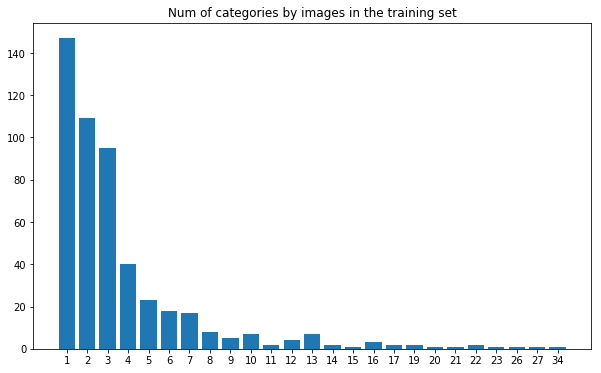

In [39]:
size_buckets = Counter(train_df['Id'].value_counts().values)
plt.figure(figsize=(10, 6))

plt.bar(range(len(size_buckets)), list(size_buckets.values())[::-1], align='center')
plt.xticks(range(len(size_buckets)), list(size_buckets.keys())[::-1])
plt.title("Num of categories by images in the training set")

plt.show()

In [40]:
train_df['Id'].value_counts()

w_1287fbc    34
w_98baff9    27
w_7554f44    26
w_1eafe46    23
w_693c9ee    22
             ..
w_effd0ea     1
w_e07f3d1     1
w_a1b985a     1
w_6871147     1
w_27cf4e2     1
Name: Id, Length: 500, dtype: int64

In [41]:
def is_grey_scale(img_path):
    """Thanks to https://stackoverflow.com/questions/23660929/how-to-check-whether-a-jpeg-image-is-color-or-gray-scale-using-only-python-stdli"""
    im = Image.open(img_path).convert('RGB')
    w,h = im.size
    for i in range(w):
        for j in range(h):
            r,g,b = im.getpixel((i,j))
            if r != g != b: return False
    return True

NameError: name 'width' is not defined

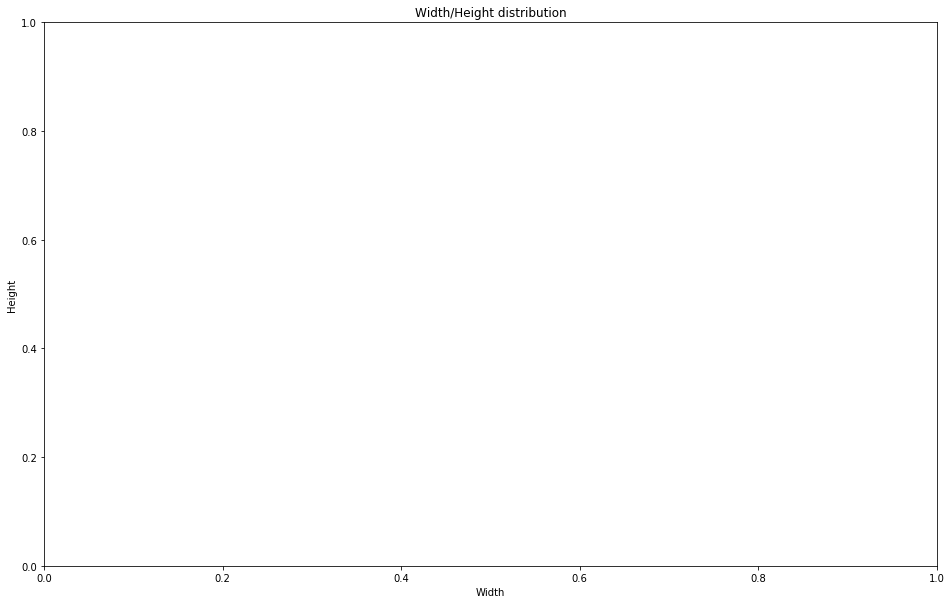

In [42]:
plt.figure(figsize=(16, 10))
plt.title('Width/Height distribution')
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(width, height, alpha=.2)
plt.show()

In [43]:
width = np.asarray(width, dtype=np.float32)
height = np.asarray(height, dtype=np.float32)
mean_aspectratio = np.mean(aspectratio)
median_aspectratio = np.median(aspectratio)
aspectratio = width/height
print('The average aspect ratio is: '+str(mean_aspectratio))
print('The median aspect ratio is: '+str(median_aspectratio))

plt.figure(figsize=(10, 6))

# the histogram of the data
n, bins, patches = plt.hist(aspectratio, 100, normed=1, facecolor='green')

# add a 'best fit' line
#y = mlab.normpdf( bins, mu, sigma)
#l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Aspect ratio')
plt.ylabel('Probability')
plt.title('Histogram of Aspect Ratios')
plt.axis([0, 10, 0, 1])
plt.grid(True)

plt.show()

NameError: name 'width' is not defined

In [44]:
train_df = pd.read_csv('final_train_500.csv')
train_df.head(10)

,Unnamed: 0,Image,Id
0,0,00022e1a.jpg,w_e15442c
1,1,000466c4.jpg,w_1287fbc
2,2,00087b01.jpg,w_da2efe0
3,3,001296d5.jpg,w_19e5482
4,4,0014cfdf.jpg,w_f22f3e3
5,5,0025e8c2.jpg,w_8b1ca89
6,6,0026a8ab.jpg,w_eaad6a8
7,7,0035632e.jpg,w_3d0bc7a
8,8,0037e7d3.jpg,w_50db782
9,9,00389cd7.jpg,w_2863d51


In [45]:
num_categories = len(train_df['Id'].unique())
     
print('Total number of categories: '+str(num_categories))

Total number of categories: 500


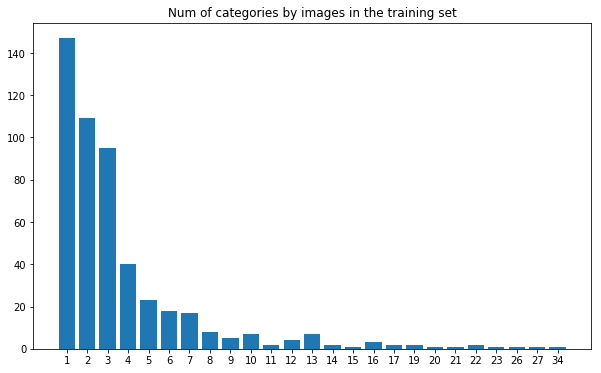

In [46]:
size_buckets = Counter(train_df['Id'].value_counts().values)
plt.figure(figsize=(10, 6))

plt.bar(range(len(size_buckets)), list(size_buckets.values())[::-1], align='center')
plt.xticks(range(len(size_buckets)), list(size_buckets.keys())[::-1])
plt.title("Num of categories by images in the training set")

plt.show()

In [47]:
train_df['Id'].value_counts()

w_1287fbc    34
w_98baff9    27
w_7554f44    26
w_1eafe46    23
w_693c9ee    22
             ..
w_effd0ea     1
w_e07f3d1     1
w_a1b985a     1
w_6871147     1
w_27cf4e2     1
Name: Id, Length: 500, dtype: int64

In [48]:
def is_grey_scale(img_path):
    """Thanks to https://stackoverflow.com/questions/23660929/how-to-check-whether-a-jpeg-image-is-color-or-gray-scale-using-only-python-stdli"""
    im = Image.open(img_path).convert('RGB')
    w,h = im.size
    for i in range(w):
        for j in range(h):
            r,g,b = im.getpixel((i,j))
            if r != g != b: return False
    return True

In [49]:
train_images = os.listdir('train_whale_500/')
height = []
width = []
aspectratio = []
print('Total number of images: '+str(len(train_images)))
img = load_img(os.path.join('train_whale_500/',train_images[1]))  # this is a PIL image
x = img_to_array(img) 
print(x.shape)
for image in train_images:
    img = load_img(os.path.join('train_whale_500/',image))  # this is a PIL image
    x = img_to_array(img)
    height.append(x.shape[0])
    width.append(x.shape[1])
    aspectratio.append(float(x.shape[1])/float(x.shape[0]))

FileNotFoundError: [Errno 2] No such file or directory: 'train_whale_500/'

NameError: name 'width' is not defined

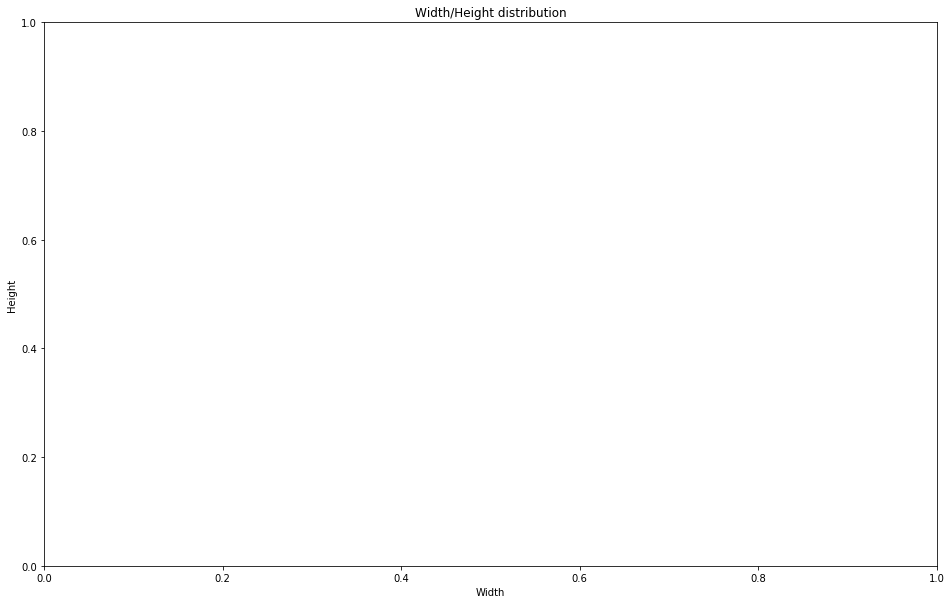

In [50]:
plt.figure(figsize=(16, 10))
plt.title('Width/Height distribution')
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(width, height, alpha=.2)
plt.show()

In [ ]:
width = np.asarray(width, dtype=np.float32)
height = np.asarray(height, dtype=np.float32)
mean_aspectratio = np.mean(aspectratio)
median_aspectratio = np.median(aspectratio)
aspectratio = width/height
print('The average aspect ratio is: '+str(mean_aspectratio))
print('The median aspect ratio is: '+str(median_aspectratio))

plt.figure(figsize=(10, 6))

# the histogram of the data
n, bins, patches = plt.hist(aspectratio, 100, normed=1, facecolor='green')

# add a 'best fit' line
#y = mlab.normpdf( bins, mu, sigma)
#l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Aspect ratio')
plt.ylabel('Probability')
plt.title('Histogram of Aspect Ratios')
plt.axis([0, 10, 0, 1])
plt.grid(True)

plt.show()

In [51]:

# Analysing Laplacian of the sample image


img = cv2.imread('train_whale/001296d5.jpg',0) # reading image in grayscale

laplacian = cv2.Laplacian(img,cv2.CV_64F) # Calculating laplacian on the image

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray') # plotting original and laplacian image for comparison
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

error: /build/opencv-iC2m9y/opencv-3.2.0+dfsg/modules/core/src/matrix.cpp:949: error: (-215) dims <= 2 && step[0] > 0 in function locateROI


TypeError: Image data cannot be converted to float

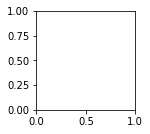

In [52]:
# Otsu's binarization
img = cv2.imread('train_whale/001296d5.jpg', cv2.IMREAD_GRAYSCALE )
thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)[1]
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray') # plotting original and laplacian image for comparison
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(thresh,cmap = 'gray')
plt.title('Otsu Binarization '), plt.xticks([]), plt.yticks([])

In [ ]:
# Analysing sift for shape feature

sift = cv2.xfeatures2d.SIFT_create() # creating object of sift descriptor

keypoints, descriptors = sift.detectAndCompute(img,None) #calculating keypoints and descriptors of the image

img1 = cv2.drawKeypoints(img, keypoints, None)# ploting the descriptors over the original image

print(descriptors.shape)# printing the shape of descriptor matrix (n, 128) n depends on the image

plt.imshow(img1) # plotting image with keypoints
plt.show()

In [ ]:
# Surf features

# Analysing surf for shape feature

surf = cv2.xfeatures2d.SURF_create() # creating object of surf descriptor

keypoints, descriptors = surf.detectAndCompute(img,None) #calculating keypoints and descriptors of the image

img1 = cv2.drawKeypoints(img, keypoints, None)# ploting the descriptors over the original image

print(descriptors.shape)# printing the shape of descriptor matrix (n, 128) n depends on the image

plt.imshow(img1) # plotting image with keypoints
plt.show()


In [53]:
# Surf features with limiting the keypoints to 200

# Analysing surf for shape feature

surf = cv2.xfeatures2d.SURF_create() # creating object of surf descriptor

keypoints, descriptors = surf.detectAndCompute(img,None) #calculating keypoints and descriptors of the image

img1 = cv2.drawKeypoints(img, keypoints[:200], None)# ploting the descriptors over the original image

print(descriptors.shape)# printing the shape of descriptor matrix (n, 128) n depends on the image

plt.imshow(img1) # plotting image with keypoints
plt.show()



AttributeError: module 'cv2' has no attribute 'xfeatures2d'

In [54]:




# Analysing orb for shape feature

orb = cv2.ORB_create() # creating object of orb descriptor

keypoints, descriptors = orb.detectAndCompute(img,None) #calculating keypoints and descriptors of the image

img1 = cv2.drawKeypoints(img, keypoints, None)# ploting the descriptors over the original image

print(descriptors.shape)# printing the shape of descriptor matrix (n, 32) n depends on the image

plt.imshow(img1) # plotting image with keypoints
plt.show()



error: /build/opencv-iC2m9y/opencv-3.2.0+dfsg/modules/features2d/src/draw.cpp:115: error: (-215) !outImage.empty() in function drawKeypoints


In [55]:
# limiting the orb keypoints to 200
# Analysing orb for shape feature

orb = cv2.ORB_create() # creating object of orb descriptor

keypoints, descriptors = orb.detectAndCompute(img,None) #calculating keypoints and descriptors of the image

img1 = cv2.drawKeypoints(img, keypoints[:200], None)# ploting the descriptors over the original image

print(descriptors.shape)# printing the shape of descriptor matrix (n, 128) n depends on the image

plt.imshow(img1) # plotting image with keypoints
plt.show()

error: /build/opencv-iC2m9y/opencv-3.2.0+dfsg/modules/features2d/src/draw.cpp:115: error: (-215) !outImage.empty() in function drawKeypoints


In [56]:
# LBP features

from mahotas.features import lbp

# Function for claculating the LbP feature
def cal_lbp(image):
    l=lbp(image, radius=8, points=6)
    return l
des=cal_lbp(img)
print(des.shape)
print(des)


ModuleNotFoundError: No module named 'mahotas'

In [57]:
# Colour Histogram

img = cv2.imread('train_whale/00ac0e86.jpg')
plt.hist(img.ravel(),256,[0,256]) 
plt.show()


AttributeError: 'NoneType' object has no attribute 'ravel'

error: /build/opencv-iC2m9y/opencv-3.2.0+dfsg/modules/imgproc/src/histogram.cpp:148: error: (-215) j < nimages in function histPrepareImages


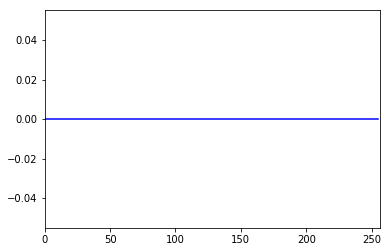

In [58]:
color = ('b','g','r')
a=[]
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    a.append(histr)
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [ ]:
# visualizing Censure algorithm

from skimage.feature import CENSURE

fixed_size= tuple((224, 224))


img = cv2.imread('train_whale/00ac0e86.jpg')

img = cv2.resize(img, fixed_size)
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,50,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

plt.imshow(img),plt.show()

In [59]:
# Canny Edge Detection
img = cv2.imread('train_whale/00ac0e86.jpg')
img = cv2.resize(img, fixed_size)
edges = cv2.Canny(img,250,300)
plt.imshow(edges,cmap = 'gray')
plt.show()

NameError: name 'fixed_size' is not defined

In [60]:

# Edge detection algorithms

img = cv2.imread('train_whale/00ac0e86.jpg')
img = cv2.resize(img, fixed_size)
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


from skimage.filters import roberts, sobel, scharr, prewitt

edge_roberts = roberts(gray)
edge_sobel = sobel(gray)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

NameError: name 'fixed_size' is not defined

In [61]:
train_df= pd.read_csv('train_500.csv')

train_df['Id'].value_counts().head(20)

w_1287fbc    34
w_98baff9    27
w_7554f44    26
w_1eafe46    23
w_693c9ee    22
w_fd1cb9d    22
w_73d5489    21
w_f19faeb    20
w_9b401eb    19
w_95874a5    19
w_eb0a6ed    17
w_dbda0d6    17
w_6c803bf    16
w_67de30b    16
w_a59905f    16
w_cae7677    15
w_b074cdf    14
w_8c1ec28    14
w_4e52a49    13
w_9ea2cc3    13
Name: Id, dtype: int64

In [62]:
train_df['Id'].value_counts().tail(20)

w_79774a5    1
w_06b6f60    1
w_8420f42    1
w_849b126    1
w_88e5933    1
w_af8cad1    1
w_ce9b95e    1
w_7523d74    1
w_5a29f9d    1
w_b5144b0    1
w_b9bfd4e    1
w_0793503    1
w_046634b    1
w_64d8a6d    1
w_6926f08    1
w_effd0ea    1
w_e07f3d1    1
w_a1b985a    1
w_6871147    1
w_27cf4e2    1
Name: Id, dtype: int64